-- Distribution functions:

1) Uniform distribtuion
2) Binomial distrbution
3) Poisson distribution
4) Normal distribution
5) T distribution
6) Chi-square distribution
7) F distribution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
df = pd.read_csv(r"Z_6_DS_PROBABILITY_DISTRIBUTIONS_movies.csv")
df.head()

,Title,Year,Genre,Duration,Director,Rating,Popularity
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275 entries, 0 to 5274
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       5275 non-null   object 
 1   Year        5275 non-null   int64  
 2   Genre       5275 non-null   object 
 3   Duration    5275 non-null   int64  
 4   Director    5275 non-null   object 
 5   Rating      5275 non-null   float64
 6   Popularity  5275 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 288.6+ KB


####  Probability of a movie having a rating greater than 6.

In [5]:
df.Rating.mean()

5.379981042654029

In [10]:
df.Rating.std()

1.2481025415142253

--   Generate random variates of size 1000 with mean value 5.4 and standard deviation 1.24

In [17]:
b = ss.norm.rvs(loc=5.4,scale=1.24,size=1000,random_state=1)
b

array([ 7.41418825,  4.64142205,  4.74506703,  4.06951891,  6.47310546,
        2.54609202,  7.56356659,  4.45610344,  5.79560848,  5.09078073,
        7.21301384,  2.84542552,  5.00020267,  4.9237726 ,  6.80587411,
        4.03613483,  5.18618902,  4.31145556,  5.45234505,  6.12269087,
        4.03523222,  6.8194574 ,  6.51797249,  6.02309298,  6.51706138,
        4.55217745,  5.24761612,  4.2396459 ,  5.06781878,  6.05764078,
        4.54234067,  4.90802563,  4.54790585,  4.351945  ,  4.5676548 ,
        5.3842959 ,  4.01453517,  5.69067547,  7.4581547 ,  6.32013476,
        5.16212392,  4.29934008,  4.47352372,  7.49864371,  5.46300162,
        4.6101254 ,  5.6367352 ,  8.00431637,  5.5489971 ,  6.16533186,
        5.7722112 ,  4.96321019,  3.98327743,  4.96681502,  5.14097115,
        6.12741276,  6.44033943,  6.55456658,  5.75412828,  6.49757504,
        4.46454655,  6.95355651,  6.03603298,  5.03036488,  6.0057625 ,
        5.30629108,  6.80322044,  7.28457285,  8.1101135 ,  3.66

C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


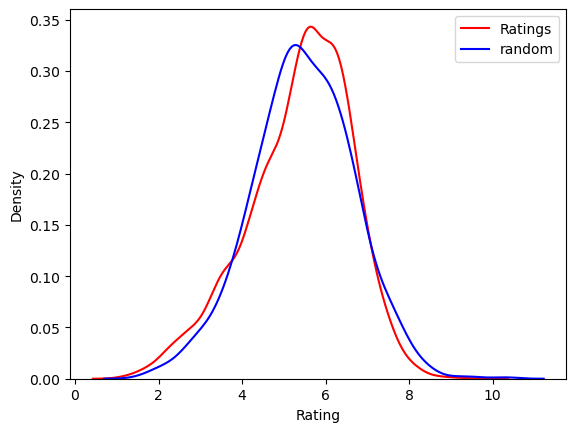

In [24]:
sns.kdeplot(df.Rating,color='red',label='Ratings')
sns.kdeplot(b,color='blue',label='random')
plt.legend()
plt.show()

In [28]:
ss.norm.cdf(6,5.4,1.24)

0.6857612772068569

In [26]:
ss.norm.pdf(6,5.4,1.24)

0.2861853876668576

In [29]:
x = np.arange(-4,4,0.001)
x

array([-4.   , -3.999, -3.998, ...,  3.997,  3.998,  3.999])

In [31]:
y_pdf = []
y_cdf = []

for i in x:
    y_cdf.append(ss.norm.cdf(i,0,1))
    y_pdf.append(ss.norm.pdf(i,0,1))

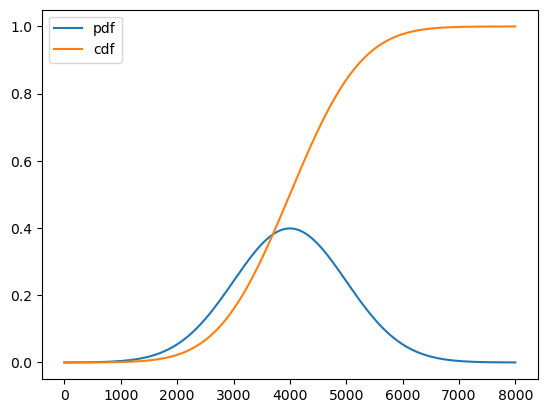

In [33]:
plt.plot(y_pdf, label = 'pdf')
plt.plot(y_cdf, label = 'cdf')
plt.legend()
plt.show()

In [45]:
1-ss.norm.cdf(x=6,loc=5.38,scale=1.25)

0.30994720547266963

Probability of a movie having a rating greater than 6 = 30.99%

### Freshco Logistic Example

- you are running logistic company
- - order - delivery time follows normal distribution
  - Average time= 10hrs
  - std.dev = 1hrs
  - your major customer intrduces a new policy that rejects orders - > 11.5hrs delivery time
  - then a loss of $1200 per delivery
  - would this be a profit for your business?

In [50]:
ss.norm.cdf(x=11.5*60, loc=10*60, scale = 60)

0.9331927987311419

--probability that an order delivers by 11.5hrs = 93.319%  
-- So 7% orders are rejected, 7%*1200 = 84$/order loss  
-- ❌  not profitable

### T distribution

--  As degree of freedom increases T distribution becomes normal distribution.  
--  T-distribution is used when the data points are less than 30 to 50 or when population parameters are unknown.

--  After seeing a possible loss of $80 per shipment due to delays.  
--  you asked process team to improve and cut down transport time.  
--  after making several changes Team recorded last 10 Deliveries time.  [528,566,589,495,582,573,545,593,592,664]  
--  What is the probability of delivery being rejected after implementation of new process.  
--  Due you see an improvement?

In [58]:
a = np.array([528,566,589,495,582,573,545,593,592,664])
a

array([528, 566, 589, 495, 582, 573, 545, 593, 592, 664])

In [59]:
a.mean()

572.7

In [60]:
a.std()

42.801985935234356

In [61]:
ss.t.cdf(x=11.5*60, loc = a.mean(), scale = a.std(),df=len(a)-1)

0.9885860602267895

--probability that an order delivers by 11.5hrs = 98.85%  
-- So 1.15% orders are rejected, 1.15%*1200 =  13.8$/order loss  
-- ✅ profitable  

###  Finding the values from probabilities.

--  Assume that a class of students scored 60 marks average in mathematics and standard deviation of 12.  
--  If you want to give an award to the top 5% of students cut off, should you choose?

In [69]:
a = ss.norm.rvs(loc=60,scale=12,size=1000)

C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

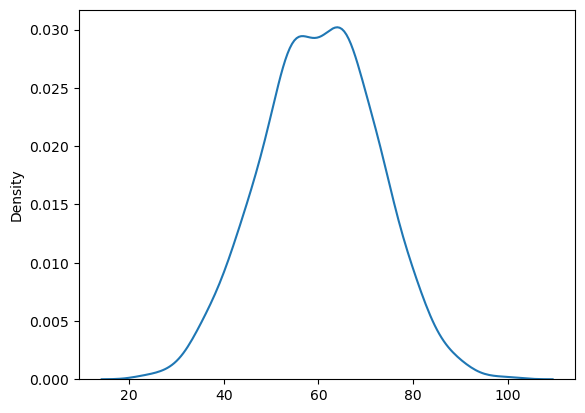

In [70]:
sns.kdeplot(a)

##### - Percentage point function

ppf = (cdf)**-1  
PPF is inverse of CDF

In [71]:
ss.norm.ppf(q=0.95,loc=60,scale=12)

79.73824352341767

--   What is the value of marks for top ten percent of the students?

In [72]:
ss.norm.ppf(q=0.90,loc=60,scale=12)

75.3786187865352

--  Below what score do bottom 10% of students are?

In [75]:
ss.norm.ppf(q=0.1,loc=60,scale=12)

44.621381213464794

In [76]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/6_DS_PROBABILITY_DISTRIBUTIONS-checkpoint.ipynb
	modified:   6_DS_PROBABILITY_DISTRIBUTIONS.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [77]:
!git add .

In [78]:
!git commit -m "adding Probability distributions"

[main 5fb447f] adding Probability distributions
 2 files changed, 602 insertions(+), 2 deletions(-)


In [79]:
!git push

To github.com:gali-jithendra/LEARNINGS.git
   efb4eb5..5fb447f  main -> main
